In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
# custom modules
from utils     import Options
from simulator import Simulator
from transitionTable import TransitionTable
from model import ConvNet

In [3]:
# 0. initialization
opt = Options()
sim = Simulator(opt.map_ind, opt.cub_siz, opt.pob_siz, opt.act_num)
trans = TransitionTable(opt.state_siz, opt.act_num, opt.hist_len,
                             opt.minibatch_size, opt.valid_size,
                             opt.states_fil, opt.labels_fil)
NeuralPlanner = ConvNet(cub_siz=opt.cub_siz,pub_siz=opt.pob_siz,hist_len=opt.hist_len,logits_units=opt.act_num,
                        num_filt1=opt.num_filt1,kernel_size1=opt.kernel_size1,num_filt2=opt.num_filt2,
                        kernel_size2=opt.kernel_size2,pool_size=opt.pool_size,dense_units=opt.dense_units,dropout_rate=opt.dropout_rate)

states & labels loaded.
states stacked w/ history of 4
train & valid data splited.


In [4]:
# Get the full data from the transition table like this:
X_train, y_train = trans.get_train()
X_valid, y_valid = trans.get_valid()
X_train = np.asarray(X_train, dtype=np.float32)
X_valid = np.asarray(X_valid, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int32)
y_valid = np.asarray(y_valid, dtype=np.int32)

print('Shape of X_train:', X_train.shape)
print('Shape of X_valid:', X_valid.shape)

# Hint: to ease loading your model later create a model.py file
# where you define your network configuration

Shape of X_train: (16000, 2500)
Shape of X_valid: (500, 2500)


In [ ]:
# alternatively you can get one random mini batch line this

# for i in range(number_of_batches):
#     x, y = trans.sample_minibatch()

In [5]:
# 1. train and save
training_accuracy,training_loss,valid_accuracy,valid_loss = NeuralPlanner.train(X_train,y_train,X_valid,y_valid,batch_size=opt.minibatch_size,n_minibatches=opt.n_minibatches,
                    num_epochs=opt.num_epochs,learning_rate=1e-3,dataset_size=None,log_interval=20,no_gpu=True,checkpoint_dir=opt.checkpoint_dir)

Using device /cpu:0.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Batch #0	Loss: 22.571812
Batch #20	Loss: 1.139229
Batch #40	Loss: 0.690515
Batch #60	Loss: 0.755291
Batch #80	Loss: 0.337566
Batch #100	Loss: 0.369613
Batch #120	Loss: 0.197500
Batch #140	Loss: 0.180481
Batch #160	Loss: 0.081082
Batch #180	Loss: 0.104235
Batch #200	Loss: 0.134023
Batch #220	Loss: 0.126073
Batch #240	Loss: 0.075933
Batch #260	Loss: 0.071565
Batch #280	Loss: 0.208277
Batch #300	Loss: 0.205451
Batch #320	Loss: 0.022329
Batch #340	Loss: 0.087009
Batch #360	Loss: 0.181348
Batch #380	Loss: 0.105818
Batch #400	Loss: 0.073868
Batch #420	Loss: 0.153501
Batch #440	Loss: 0.265324
Batch #460	Loss: 0.138779
Batch #480	Loss: 0.032163

Train time for epoch #1 (global step 500): 85.564867
Validation set: Average loss: 0.1620, Accuracy: 93.60%

Batch #0	Loss: 0.083241
Batch #20	L

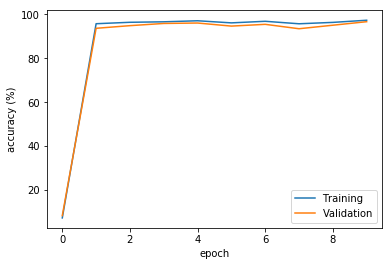

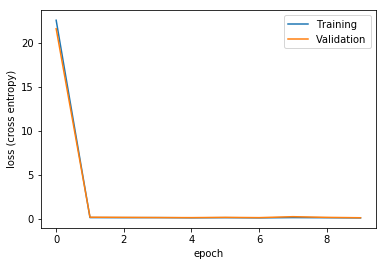

In [8]:
import matplotlib.pyplot as plt
plt.ion()
plt.close('all')
# Plot learning curve
plt.figure()
plt.plot(training_accuracy*100,label='Training')
plt.plot(valid_accuracy*100,label='Validation')
plt.xlabel('epoch')
plt.ylabel('accuracy (%)')
plt.legend()

plt.figure()
plt.plot(training_loss,label='Training')
plt.plot(valid_loss,label='Validation')
plt.xlabel('epoch')
plt.ylabel('loss (cross entropy)')
plt.legend()